In [34]:
import quandl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

quandl.ApiConfig.api_key = '9WMULuEUh3RNrruWqkYU'

df = quandl.get("WIKI/MSFT")
df = df[['Adj. Close']]

In [35]:
df

,Adj. Close
Date,
1986-03-13,0.064720
1986-03-14,0.067031
1986-03-17,0.068187
1986-03-18,0.066454
1986-03-19,0.065298
...,...
2018-03-21,92.480000
2018-03-22,89.790000
2018-03-23,87.180000


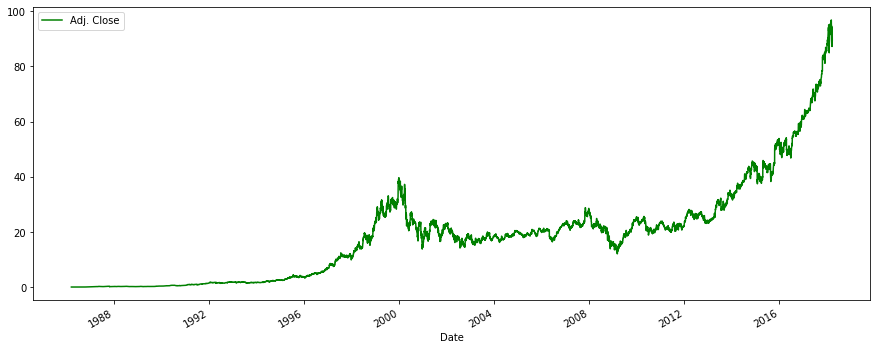

In [36]:
df['Adj. Close'].plot(figsize=(15,6), color = 'g')
plt.legend(loc='upper left')
plt.show()

In [37]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]

X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)
confidence

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

0.9866556015607089

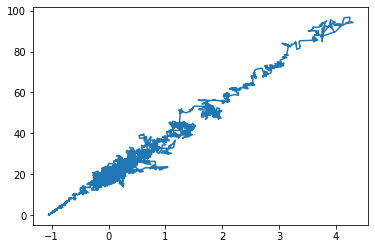

In [42]:
plt.plot(X, y)

(736445.0, 737396.6)

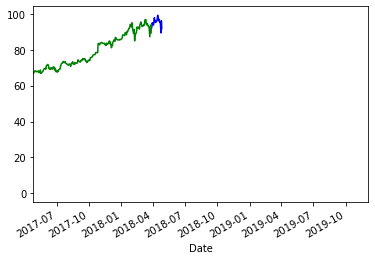

In [43]:
dates = pd.date_range(start = "2018-03-28", end = "2018-04-26")

plt.plot(dates, forecast_predicted, color='b')
df['Adj. Close'].plot(color='g')

plt.xlim(xmin=datetime.date(2017,4,26))